In [1]:
# HIDDEN
# The standard set of libraries we need
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Make plots look a little bit more fancy
plt.style.use('fivethirtyeight')

### Iteration ###

It is often the case in programming – especially when dealing with randomness
– that we want to repeat a process multiple times.

Consider the numpy function `random.choice`. It claims to choose randomly
between the elements on an array that we pass it.  Here we make an array of
strings containing two choices:


In [2]:
coin = np.array(['Heads', 'Tails'])

We use `np.random.choice` to choose randomly between these two elements:

In [3]:
np.random.choice(coin)

'Tails'

We might want to check whether `np.random.choice` does in fact pick either
option with about the same probability.  To do that, we could start by runing
the following cell many times to see if we get roughly equal numbers of `"Heads"` and `"Tails"`.

In [4]:
np.random.choice(coin)

'Tails'

We might want to re-run code with slightly different input or other slightly
different behavior. We could copy-paste the code multiple times, but that's
tedious and prone to typos, and if we wanted to do it a thousand times or
a million times, forget it.

A more automated solution is to use a `for` statement to loop over the contents
of a sequence. This is called *iteration*. A `for` statement begins with the
word `for`, followed by a name we want to give each item in the sequence,
followed by the word `in`, and ending with an expression that evaluates to
a sequence. The indented body of the `for` statement is executed once *for each
item in that sequence*.

In [5]:
for i in np.arange(3):
    print(i)

0
1
2


It is instructive to imagine code that exactly replicates a `for` statement
without the `for` statement.  (This is called *unrolling* the loop.)  A `for`
statement simple replicates the code inside it, but before each iteration, it
assigns a new value from the given sequence to the name we chose.  For example,
here is an unrolled version of the loop above:

In [6]:
i = np.arange(3)[0]
print(i)
i = np.arange(3)[1]
print(i)
i = np.arange(3)[2]
print(i)

0
1
2


Notice that the name `i` is arbitrary, just like any name we assign with `=`.  For example, the following `for` loop works in just the same way as the `for` loop above:

In [7]:
for my_variable in np.arange(3):
    print(my_variable)

0
1
2


In the next example, we use a `for` statement in a more realistic way:
we print the results of five random choices:

In [8]:
for i in np.arange(5):
    print(np.random.choice(coin))

Heads
Tails
Tails
Heads
Heads


In this case, we simply perform exactly the same (random) action several times,
so the code inside our `for` statement does not actually refer to the variable
`i`.

### Collecting results with lists

While the `for` statement above does simulate the results of five
tosses of a coin, the results are simply printed and aren't in a form
that we can use for computation. Thus a typical use of a `for`
statement is to create an array of results, by augmenting it each time.

We can use the `append` method of a list do do this.  As you saw in the page on [lists](lists), we can use the `append` method of a list to append a value to the list.


In [9]:
# A list with two strings
pets = ['Cat', 'Dog']

In [10]:
pets.append('Rabbit')
pets

['Cat', 'Dog', 'Rabbit']

### Example: Counting the Number of Heads ###

We can now simulate five tosses of a coin and place the results into
an array. We will start by creating an empty array and then appending
the result of each toss.

In [11]:
# An empty list
tosses = []

for i in np.arange(5):
    tosses.append(np.random.choice(coin))

tosses

['Heads', 'Heads', 'Tails', 'Tails', 'Tails']

Let us rewrite the cell with the `for` statement unrolled:

In [12]:
# An empty list
tosses = []

i = np.arange(5)[0]
tosses.append(np.random.choice(coin))
i = np.arange(5)[1]
tosses.append(np.random.choice(coin))
i = np.arange(5)[2]
tosses.append(np.random.choice(coin))
i = np.arange(5)[3]
tosses.append(np.random.choice(coin))
i = np.arange(5)[4]
tosses.append(np.random.choice(coin))

tosses

['Tails', 'Tails', 'Heads', 'Heads', 'Heads']

We have captured the results in an list, but we want to give ourselves
the ability to use array methods to do computations.  To do this, we convert the list into an array:

In [13]:
toss_arr = np.array(tosses)

Now we have an array, we can use `np.count_nonzero` to count the
number of heads in the five tosses.

In [14]:
np.count_nonzero(toss_arr == 'Heads')

3

Iteration is a powerful technique. For example, by running exactly the
same code for 1000 tosses instead of 5, we can count the number of
heads in 1000 tosses.

In [15]:
tosses = []

for i in np.arange(1000):
    tosses.append(np.random.choice(coin))

toss_arr = np.array(tosses)
np.count_nonzero(toss_arr == 'Heads')

482

### Example: Number of Heads in 100 Tosses ###

It is natural to expect that in 100 tosses of a coin, there will be 50
heads, give or take a few.

But how many is "a few"? What's the chance of getting exactly 50
heads? Questions like these matter in data science not only because
they are about interesting aspects of randomness, but also because
they can be used in analyzing experiments where assignments to
treatment and control groups are decided by the toss of a coin.

In this example we will simulate 10,000 repetitions of the following
experiment:

- Toss a coin 100 times and record the number of heads.

The histogram of our results will give us some insight into how many
heads are likely.

As a preliminary, note that `np.random.choice` takes an optional
second argument that specifies the number of choices to make. By
default, the choices are made with replacement, meaning that there is
the same chance of getting a `Head` for all the choices returned. Here
is a simulation of 10 tosses of a coin:

In [16]:
np.random.choice(coin, 10)

array(['Heads', 'Tails', 'Heads', 'Tails', 'Tails', 'Tails', 'Tails',
       'Heads', 'Tails', 'Tails'], dtype='<U5')

Now let's study 100 tosses. We will start by creating an empty array
called `heads`. Then, in each of the 10,000 repetitions, we will toss
a coin 100 times, count the number of heads, and append it to `heads`.

In [17]:
N = 10000

head_counts = []

for i in np.arange(N):
    tosses = np.random.choice(coin, 100)
    n_heads = np.count_nonzero(tosses == 'Heads')
    head_counts.append(n_heads)

head_counts

[58,
 50,
 47,
 45,
 56,
 58,
 49,
 42,
 52,
 50,
 49,
 50,
 59,
 49,
 45,
 42,
 49,
 52,
 47,
 55,
 58,
 56,
 49,
 51,
 46,
 51,
 54,
 46,
 50,
 49,
 57,
 52,
 51,
 49,
 45,
 45,
 50,
 55,
 52,
 48,
 44,
 59,
 52,
 53,
 63,
 49,
 39,
 48,
 50,
 59,
 53,
 47,
 48,
 55,
 48,
 50,
 50,
 56,
 50,
 55,
 49,
 55,
 54,
 57,
 56,
 52,
 50,
 46,
 53,
 52,
 49,
 59,
 57,
 48,
 43,
 48,
 51,
 46,
 56,
 44,
 51,
 44,
 50,
 55,
 49,
 44,
 53,
 54,
 50,
 48,
 47,
 48,
 45,
 51,
 53,
 56,
 46,
 43,
 53,
 44,
 51,
 52,
 46,
 57,
 46,
 53,
 45,
 47,
 54,
 48,
 51,
 59,
 57,
 59,
 53,
 46,
 47,
 46,
 43,
 48,
 61,
 49,
 53,
 55,
 51,
 58,
 55,
 43,
 62,
 39,
 56,
 52,
 48,
 54,
 48,
 47,
 52,
 52,
 50,
 57,
 49,
 51,
 49,
 47,
 49,
 56,
 48,
 54,
 47,
 56,
 43,
 61,
 48,
 54,
 49,
 44,
 56,
 49,
 51,
 55,
 50,
 51,
 50,
 50,
 54,
 50,
 51,
 47,
 37,
 57,
 55,
 46,
 44,
 48,
 47,
 57,
 58,
 53,
 43,
 45,
 55,
 44,
 54,
 48,
 58,
 50,
 53,
 55,
 46,
 46,
 48,
 50,
 53,
 50,
 53,
 55,
 51,
 50,
 62,
 47,


Here is a histogram of the data, with bins of width 1 centered at each
value of the number of heads.

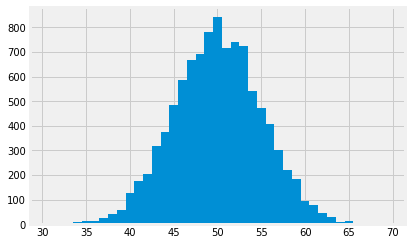

In [18]:
plt.hist(head_counts, bins=np.arange(30.5, 69.6, 1));

Not surprisingly, the histogram looks roughly symmetric around 50
heads. The height of the bar at 50 is about 8% per unit. Since each
bin is 1 unit wide, this is the same as saying that about 8% of the
repetitions produced exactly 50 heads. That's not a huge percent, but
it's the largest compared to the percent at every other number of
heads.

The histogram also shows that in almost all of the repetitions, the
number of heads in 100 tosses was somewhere between 35 and 65. Indeed,
the bulk of the repetitions produced numbers of heads in the range 45
to 55.

While in theory it is *possible* that the number of heads can be
anywhere between 0 and 100, the simulation shows that the range of
*probable* values is much smaller.

This is an instance of a more general phenomenon about the variability
in coin tossing, as we will see later in the course.

Now see [the for loop exercises](../exercises/for_loops).

{% data8page Iteration %}